### Importação dos dados



In [41]:
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

lojas = [loja1, loja2, loja3, loja4]

loja1.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento



In [40]:
dados_faturamento = []

for i, df in enumerate(lojas, start=1):
    faturamento = df['Preço'].sum()
    dados_faturamento.append([f'Loja {i}', f"R$ {faturamento:,.2f}"])

print("\nFaturamento total por loja:\n")
print(
    tabulate(
        dados_faturamento,
        headers=["Loja", "Faturamento"],
        tablefmt="fancy_grid",
        stralign="center"
    )
)



Faturamento total por loja:

╒════════╤═════════════════╕
│  Loja  │   Faturamento   │
╞════════╪═════════════════╡
│ Loja 1 │ R$ 1,534,509.12 │
├────────┼─────────────────┤
│ Loja 2 │ R$ 1,488,459.06 │
├────────┼─────────────────┤
│ Loja 3 │ R$ 1,464,025.03 │
├────────┼─────────────────┤
│ Loja 4 │ R$ 1,384,497.58 │
╘════════╧═════════════════╛


## 1.1 Visualização

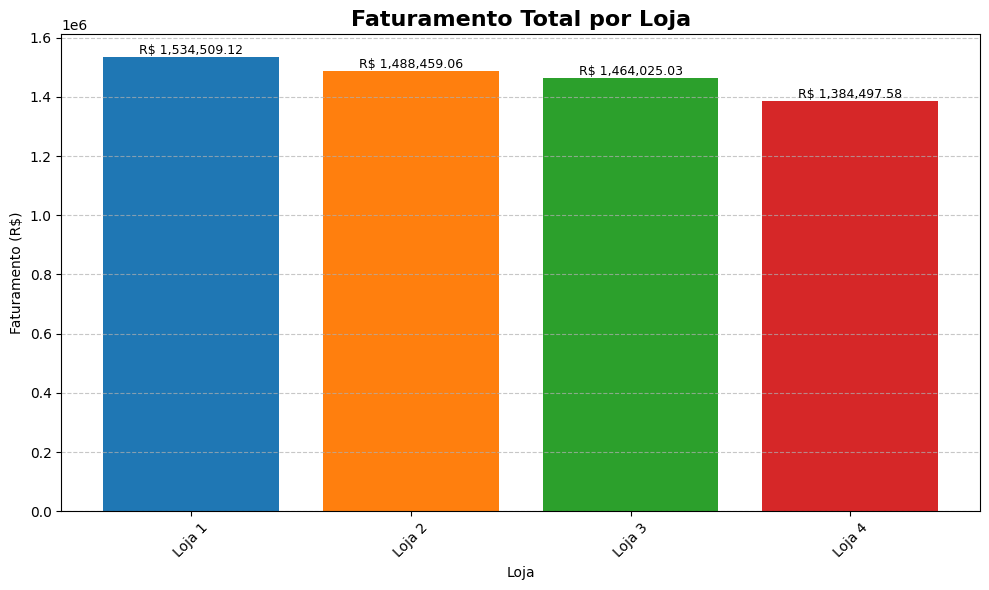

In [39]:
lojas_nomes = [loja[0] for loja in dados_faturamento]
faturamentos = [float(loja[1].replace("R$", "").replace(",", "").replace(".", "")) / 100 for loja in dados_faturamento]

cores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
plt.figure(figsize=(10, 6))
plt.bar(lojas_nomes, faturamentos, color=cores)
plt.title('Faturamento Total por Loja', fontsize=16, fontweight='bold')
plt.xlabel('Loja')
plt.ylabel('Faturamento (R$)')
plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=0)
plt.xticks(rotation=45)

for i, faturamento in enumerate(faturamentos):
    plt.text(i, faturamento, f'R$ {faturamento:,.2f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# 2. Vendas por Categoria

In [38]:
for i, df in enumerate(lojas, start=1):
    categorias = (
        df.groupby('Categoria do Produto')['Produto']
        .count()
        .reset_index(name='Quantidade')
        .sort_values(by='Quantidade', ascending=False)
    )

    print(f"\n===== CATEGORIAS MAIS POPULARES — LOJA {i} =====\n")
    print(
        tabulate(
            categorias,
            headers='keys',
            tablefmt='fancy_grid',
            showindex=False
        )
    )


===== CATEGORIAS MAIS POPULARES — LOJA 1 =====

╒════════════════════════╤══════════════╕
│ Categoria do Produto   │   Quantidade │
╞════════════════════════╪══════════════╡
│ moveis                 │          465 │
├────────────────────────┼──────────────┤
│ eletronicos            │          448 │
├────────────────────────┼──────────────┤
│ brinquedos             │          324 │
├────────────────────────┼──────────────┤
│ eletrodomesticos       │          312 │
├────────────────────────┼──────────────┤
│ esporte e lazer        │          284 │
├────────────────────────┼──────────────┤
│ instrumentos musicais  │          182 │
├────────────────────────┼──────────────┤
│ livros                 │          173 │
├────────────────────────┼──────────────┤
│ utilidades domesticas  │          171 │
╘════════════════════════╧══════════════╛

===== CATEGORIAS MAIS POPULARES — LOJA 2 =====

╒════════════════════════╤══════════════╕
│ Categoria do Produto   │   Quantidade │
╞═══════════════════

##2.1 Visualização

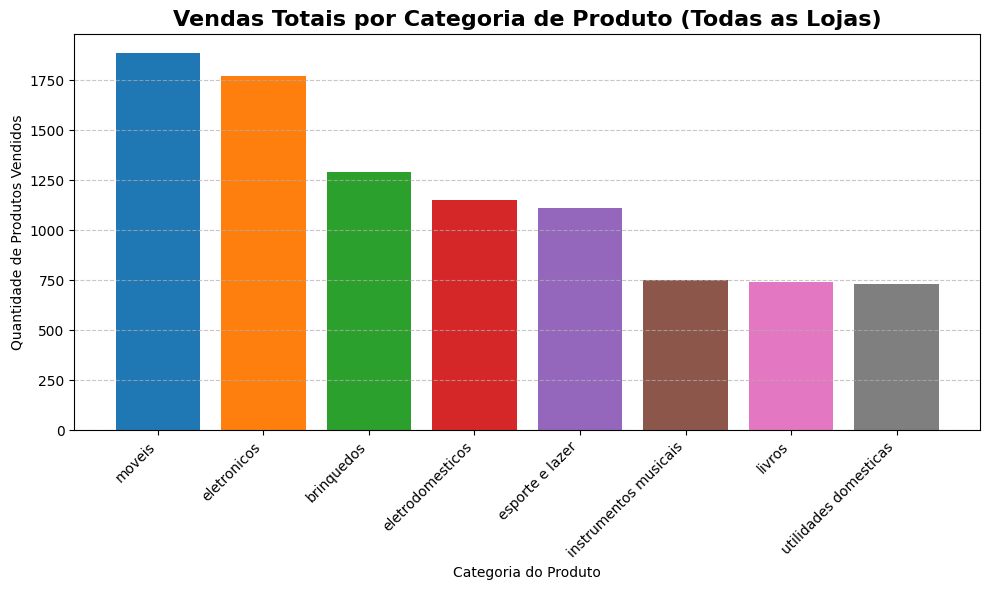

In [37]:
total_categorias = pd.concat([df.groupby('Categoria do Produto')['Produto'].count().reset_index(name='Quantidade').assign(Loja=f'Loja {i}') for i, df in enumerate(lojas, start=1)])

total_categorias_agregado = total_categorias.groupby('Categoria do Produto')['Quantidade'].sum().reset_index()

total_categorias_agregado = total_categorias_agregado.sort_values(by='Quantidade', ascending=False)

cores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']
plt.figure(figsize=(10, 6))
plt.bar(
    total_categorias_agregado['Categoria do Produto'],
    total_categorias_agregado['Quantidade'],
    color=cores
)
plt.title('Vendas Totais por Categoria de Produto (Todas as Lojas)', fontsize=16, fontweight='bold')
plt.xlabel('Categoria do Produto')
plt.ylabel('Quantidade de Produtos Vendidos')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 3. Média de Avaliação das Lojas


In [36]:
dados_avaliacoes = []

for i, loja in enumerate(lojas, start=1):
    media = loja['Avaliação da compra'].mean()
    dados_avaliacoes.append([f'Loja {i}', f"{media:.2f} / 5.00"])

print("\nMédia das avaliações de compra:\n")
print(
    tabulate(
        dados_avaliacoes,
        headers=['Loja', 'Média da Avaliação'],
        tablefmt='fancy_grid',
        stralign='center'
    )
)



Média das avaliações de compra:

╒════════╤══════════════════════╕
│  Loja  │  Média da Avaliação  │
╞════════╪══════════════════════╡
│ Loja 1 │     3.98 / 5.00      │
├────────┼──────────────────────┤
│ Loja 2 │     4.04 / 5.00      │
├────────┼──────────────────────┤
│ Loja 3 │     4.05 / 5.00      │
├────────┼──────────────────────┤
│ Loja 4 │     4.00 / 5.00      │
╘════════╧══════════════════════╛


# 4. Produtos Mais e Menos Vendidos



In [35]:
for i, df in enumerate(lojas, start=1):
    produtos = (
        df.groupby("Produto")["Quantidade de parcelas"]
        .sum()
        .reset_index(name="Quantidade")
        .sort_values(by="Quantidade", ascending=False)
    )

    mais_vendidos = produtos.head(3)
    menos_vendidos = produtos.tail(3)

    print(f"\n===== LOJA {i} =====")
    print("\nProdutos mais vendidos:")
    print(tabulate(mais_vendidos, headers='keys', tablefmt='fancy_grid', showindex=False))

    print("\nProdutos menos vendidos:")
    print(tabulate(menos_vendidos, headers='keys', tablefmt='fancy_grid', showindex=False))


===== LOJA 1 =====

Produtos mais vendidos:
╒════════════════════╤══════════════╕
│ Produto            │   Quantidade │
╞════════════════════╪══════════════╡
│ Secadora de roupas │          214 │
├────────────────────┼──────────────┤
│ TV Led UHD 4K      │          196 │
├────────────────────┼──────────────┤
│ Cômoda             │          188 │
╘════════════════════╧══════════════╛

Produtos menos vendidos:
╒════════════════╤══════════════╕
│ Produto        │   Quantidade │
╞════════════════╪══════════════╡
│ Dinossauro Rex │           94 │
├────────────────┼──────────────┤
│ Mochila        │           90 │
├────────────────┼──────────────┤
│ Celular ABXY   │           78 │
╘════════════════╧══════════════╛

===== LOJA 2 =====

Produtos mais vendidos:
╒══════════════════════════╤══════════════╕
│ Produto                  │   Quantidade │
╞══════════════════════════╪══════════════╡
│ Iniciando em programação │          223 │
├──────────────────────────┼──────────────┤
│ Celular Plus X

##4.1 Visualização

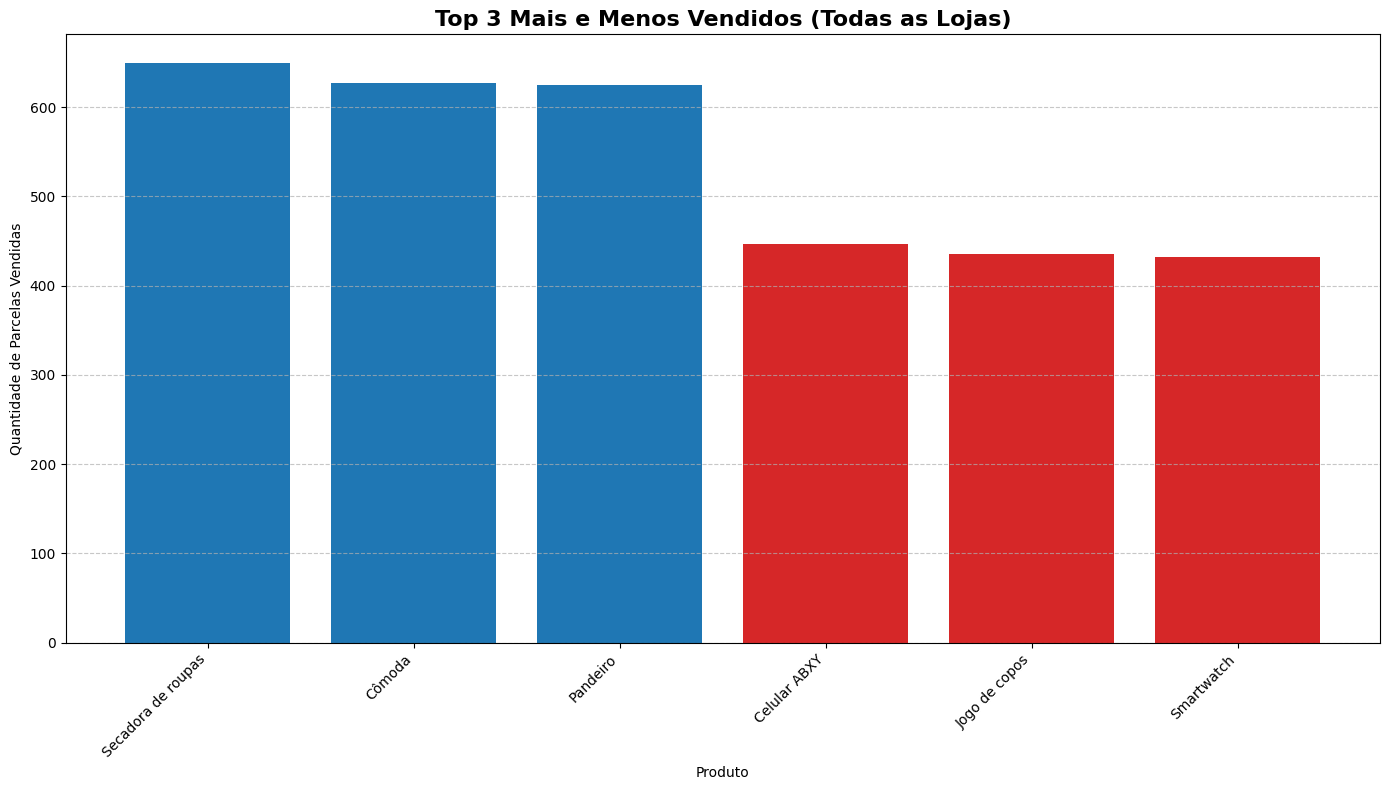

In [46]:
top_n = 3

all_products_sales = pd.DataFrame()
for i, df in enumerate(lojas, start=1):
    products_sales_per_store = df.groupby("Produto")["Quantidade de parcelas"].sum().reset_index(name="Quantidade")
    all_products_sales = pd.concat([all_products_sales, products_sales_per_store])

all_products_sales_aggregated = all_products_sales.groupby("Produto")["Quantidade"].sum().reset_index()
all_products_sales_aggregated = all_products_sales_aggregated.sort_values(by="Quantidade", ascending=False)

overall_mais_vendidos = all_products_sales_aggregated.head(top_n).copy()
overall_menos_vendidos = all_products_sales_aggregated.tail(top_n).copy()

overall_mais_vendidos['Tipo'] = 'Mais vendidos'
overall_menos_vendidos['Tipo'] = 'Menos vendidos'

dados_plot = pd.concat([overall_mais_vendidos, overall_menos_vendidos])

plt.figure(figsize=(14, 8))
cores = ['#1f77b4' if tipo == 'Mais vendidos' else '#d62728' for tipo in dados_plot['Tipo']]
plt.bar(dados_plot['Produto'], dados_plot['Quantidade'], color=cores)

plt.xlabel('Produto')
plt.ylabel('Quantidade de Parcelas Vendidas')
plt.title(f'Top {top_n} Mais e Menos Vendidos (Todas as Lojas)', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 5. Frete Médio por Loja

In [33]:
media_frete = {}
for i, loja_df in enumerate(lojas, start=1):
    media_frete[f'Loja {i}'] = loja_df['Frete'].mean()

df_frete = pd.DataFrame(list(media_frete.items()),
columns=["Loja", "Custo Médio de Frete"])
df_frete["Custo Médio de Frete"] = df_frete["Custo Médio de Frete"].round(2)

print("\nCusto médio de frete por loja:\n")
print(
    tabulate(
        df_frete,
        headers='keys',
        tablefmt='fancy_grid',
        showindex=False,
        floatfmt=".2f"
    )
)


Custo médio de frete por loja:

╒════════╤════════════════════════╕
│ Loja   │   Custo Médio de Frete │
╞════════╪════════════════════════╡
│ Loja 1 │                  34.69 │
├────────┼────────────────────────┤
│ Loja 2 │                  33.62 │
├────────┼────────────────────────┤
│ Loja 3 │                  33.07 │
├────────┼────────────────────────┤
│ Loja 4 │                  31.28 │
╘════════╧════════════════════════╛


#6. Relatório Final

## Introdução

Com base nas análises realizadas e gráficos gerados, foi analisado entre 4 lojas, qual possui o pior desempenho e deve ser vendida.

**Critérios:**


*   O **faturamento total** das lojas;
*   As **categorias de produtos mais e menos vendidas**;
*   A **média das avaliações** de clientes por loja;
*   Os **produtos mais e menos vendidos**;
*   O **frete médio** de cada loja.

## Análises

1. **Análise do faturamento:** A **Loja 4** registrou o faturamento mais baixo do grupo, o que revela pouca geração de receita e uma movimentação de vendas reduzida.

2. **Vendas por categoria:** A **Loja 3** apresentou a maior diferença entre as categorias mais e menos vendidas. Isso pode indicar uma baixa capacidade de trabalhar bem com uma variedade de produtos.

3. **Média de Avaliação das Lojas:** A **Loja 1** obteve as avaliações mais baixas, sugerindo que os clientes podem estar insatisfeitos com os produtos, o atendimento ou ambos.

4. **Produtos mais e menos vendidos:** A **Loja 3** reúne muitos produtos com desempenho muito baixo. É a loja com o menor pico de vendas entre seus itens mais vendidos e com a menor diferença entre o produto mais e o menos vendido.

5. **Frete médio por loja:** A **Loja 1** apresenta o frete médio mais alto entre todas, o que pode afastar consumidores no momento da compra.

## Conclusão

A **Loja 3** deve ser vendida porque apresenta desempenho fraco em vários aspectos: possui o segundo menor faturamento, um portfólio de produtos pouco competitivo e um volume de vendas baixo em diversas categorias, indicando pouca atratividade para o público. Mesmo oferecendo o frete mais barato, a loja não demonstra eficiência nem potencial estratégico dentro do grupo.


